In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [5]:
df = pd.read_csv('fase1_1.csv')
df

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1712,2019869,Alice,Laranjeira,Informática,11,1,17.0
1713,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1714,20071160,Lucas,Capicua,Informática,12,1,20.0
1715,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [6]:
df.head(10)

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
5,2020151,Beatriz,Laranjeira,Psicologia,10,1,18.0
6,20191405,Diana,Morais,Psicologia,19,1,11.0
7,2022311,Catarina,Cintra,Comunicação,20,1,10.0
8,20071496,Leonardo,Laranjeira,Comunicação,11,1,17.0
9,2019178,Marta,Pires,Informática,14,1,14.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nr_aluno         1717 non-null   int64  
 1   nome             1717 non-null   object 
 2   apelido          1717 non-null   object 
 3   curso            1717 non-null   object 
 4   media_entrada    1717 non-null   int64  
 5   curso_concluido  1717 non-null   int64  
 6   media_final      1717 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 94.0+ KB


In [9]:
df.describe()

,nr_aluno,media_entrada,curso_concluido,media_final
count,1.717000e+03,1717.000000,1717.0,1717.000000
mean,7.045000e+07,15.078626,1.0,14.936517
std,3.251712e+08,3.225986,0.0,3.225958
min,2.021600e+04,10.000000,1.0,10.000000
25%,2.019521e+06,12.000000,1.0,12.000000
50%,2.022554e+06,15.000000,1.0,15.000000
75%,2.020136e+07,18.000000,1.0,18.000000
max,2.022174e+09,20.000000,1.0,20.000000


Correlação entre a média de entrada e a média final -0.8801223419637589


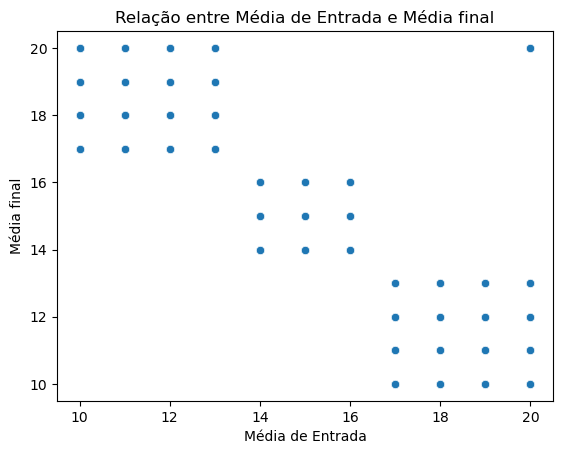

In [11]:
# Calcular a correlação
correlation = df['media_entrada'].corr(df['media_final'])
print(f"Correlação entre a média de entrada e a média final {correlation}")

# Criar um gráfico de dispersão
sns.scatterplot(x='media_entrada', y='media_final', data=df)
plt.title('Relação entre Média de Entrada e Média final')
plt.xlabel('Média de Entrada')
plt.ylabel('Média final')
plt.show()

## Interpretação da Correlação
#### Correlação Forte e Negativa:
 - Uma correlação de -0,88 indica uma relação forte e negativa entre as duas variáveis.
 - Isso significa que, em geral, alunos com uma média de entrada mais alta tendem a ter uma média de conclusão mais baixa, e vice-versa.
 

## Possíveis Conclusões
#### Desempenho Inversamente Relacionado:

 - Os alunos que entram com melhores notas na licenciatura podem-se desleixar durante o curso que resulya numa média final mais baixa.
 - Alternativamente, pode haver fatores externos (por exemplo, pressão ou expectativas) que fazem com que esses alunos não mantenham o seu desempenho inicial.
 


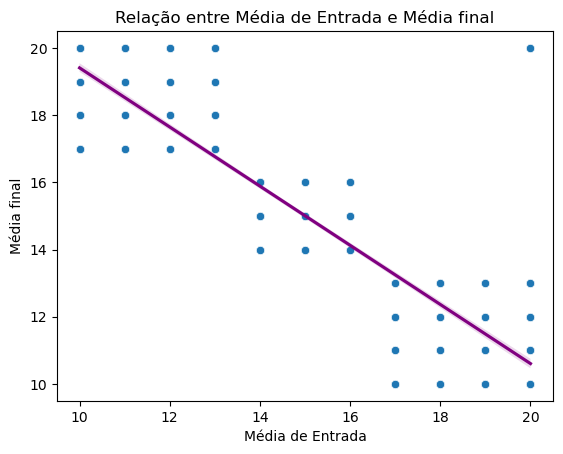

In [13]:
#  Adicionei uma linha de tendência para visualizar melhor a relação negativa.

sns.scatterplot(x='media_entrada', y='media_final', data=df)
sns.regplot(x='media_entrada', y='media_final', data=df, scatter=False, color='purple')
plt.title('Relação entre Média de Entrada e Média final')
plt.xlabel('Média de Entrada')
plt.ylabel('Média final')
plt.show()

In [17]:
df['curso'].unique()

array(['Psicologia', 'Informática', 'Comunicação'], dtype=object)

In [18]:
# Função para calcular a correlação por curso
def calcular_correlacao_por_curso(df):
    correlacoes = {}
    cursos = df['curso'].unique()
    for curso in cursos:
        subset = df[df['curso'] == curso]
        correlacao = subset['media_entrada'].corr(subset['media_final'])
        correlacoes[curso] = correlacao
    return correlacoes


In [19]:
# Calcular correlação por curso
correlacoes_por_curso = calcular_correlacao_por_curso(df)

# Exibir os resultados
for curso, correlacao in correlacoes_por_curso.items():
    print(f"Correlação para o curso {curso}: {correlacao}")

Correlação para o curso Psicologia: -0.867125463180352
Correlação para o curso Informática: -0.8826695511867416
Correlação para o curso Comunicação: -0.8900160467120879
